In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Businesses 

In [3]:
# Loading data 
b_data = pd.read_json('business.json', lines=True)
b_sub = b_data.sample(frac=0.01)

In [4]:
#Filtering Data

# b_data = b_data[b_data.is_open == 1]
b_sub = b_sub[b_sub.is_open == 1]

In [5]:
labels = ['Restaurants', 'restaurants','Restaurant', 'restaurant','bar','Bar','bars','Bars',
          'Food','food','Foods','foods','Dinner','dinner','Breakfast','breakfast']
def is_restaurant(x): 
    for label in labels: 
        if label in x:
            return True
    return False 

In [28]:
# Extracting restaurants
b_filt = b_sub[b_sub.categories.apply(is_restaurant)]
b_filt

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
99585,3588-3964 E Sky Harbor Blvd,"{'GoodForMeal': {'dessert': False, 'latenight'...",MSs0wl1az48XdhtuBEAp9w,"[Restaurants, Salad, Sandwiches]",Phoenix,{},1,33.437145,-111.999629,Dilly's Deli,,85034,10,3.0,AZ
21472,1704 Central Ave,"{'GoodForMeal': {'dessert': False, 'latenight'...",rPwpZhrVsMngVgERNexZ5Q,"[Flowers & Gifts, Grocery, Food, Shopping, Dru...",Charlotte,"{'Monday': '6:00-0:00', 'Tuesday': '6:00-0:00'...",1,35.220005,-80.810397,Harris Teeter,Plaza Midwood,28205,67,3.0,NC
61799,1 Bartley Bull Parkway,"{'RestaurantsTableService': True, 'GoodForMeal...",pn0vdwO7vLa3Wgm1r5ZnhA,"[Buffets, Indian, Restaurants]",Brampton,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,43.667253,-79.733554,Anjappar Chettinad Restaurants,,L6W 3T7,38,3.5,ON
72123,66 W Pike St,"{'BusinessAcceptsCreditCards': False, 'Restaur...",Ky0gfIL4349HicaGlOz1_Q,"[Ice Cream & Frozen Yogurt, Food]",Canonsburg,"{'Monday': '12:00-21:30', 'Tuesday': '12:00-21...",1,40.258625,-80.187712,Iceburg's,,15317,3,4.5,PA
16581,5555 Eglinton Ave W,"{'RestaurantsTableService': True, 'GoodForMeal...",qf-5sgc0x0IC_bIdJZL0yQ,"[Steakhouses, Japanese, Restaurants]",Etobicoke,{},1,43.649063,-79.604379,Prince Japanese Steak House,,M9C 5M1,43,3.5,ON
15441,2351 Century Dr,"{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",fHiR0_jn9x5lGfyRSMR7cw,"[Drugstores, Mobile Phones, Discount Store, Gr...",West Mifflin,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,40.341795,-79.946559,Walmart Supercenter,,15122,27,2.5,PA
155513,363 Rue Villeray,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",dmU0c9UkTYAc1KkaKfTosQ,"[Food, Bakeries]",Montréal,"{'Tuesday': '9:00-18:00', 'Friday': '9:00-19:0...",1,45.540345,-73.623284,Mlles Gâteaux,Villeray-Saint-Michel-Parc-Extension,H2R 1H1,6,3.5,QC
79932,803 N Cannon Blvd,"{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",MNwJ-40jcDZakqEQP4bk4g,"[Sushi Bars, Japanese, Teppanyaki, Chinese, Re...",Kannapolis,"{'Monday': '11:00-21:30', 'Tuesday': '11:00-21...",1,35.505896,-80.609678,China Buffet,,28083,14,3.5,NC
1382,1481 Gerrard Street E,"{'RestaurantsTableService': False, 'GoodForMea...",EqklwVjVvlXAx15-Xeh5EA,"[Restaurants, Cafes, Shopping, Bakeries, Food,...",Toronto,"{'Monday': '8:00-17:30', 'Tuesday': '8:00-17:3...",1,43.672477,-79.320474,Flying Pony,Leslieville,M4L 2A1,19,4.0,ON
140464,"Sino Mall Food Court, 888 Dundas Street E","{'RestaurantsTableService': False, 'GoodForMea...",GDyBweathNS9fqH9f2yOMQ,"[Restaurants, Sushi Bars]",Mississauga,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,43.598486,-79.595130,Kaoi Sushi,,L4Y 4G6,31,4.0,ON


511

In [245]:
#Number of Restaurants in top 25 cities
a = sorted([(label, len(info)) for label, info in b_filt.groupby('city')],key=lambda x: x[1],reverse=True)

In [248]:
b_filt.groupby('city').groups

{'Ajax': Int64Index([139518, 54322], dtype='int64'),
 'Anjou': Int64Index([62917], dtype='int64'),
 'Anthem': Int64Index([112662], dtype='int64'),
 'Aurora': Int64Index([13820], dtype='int64'),
 'Avondale': Int64Index([43914], dtype='int64'),
 'Bedford': Int64Index([37084], dtype='int64'),
 'Bellevue': Int64Index([46456], dtype='int64'),
 'Bradford': Int64Index([15907], dtype='int64'),
 'Brampton': Int64Index([61799, 11609, 147147, 43356, 105753], dtype='int64'),
 'Brecksville': Int64Index([75594], dtype='int64'),
 'Bridgeville': Int64Index([84038], dtype='int64'),
 'Brook Park': Int64Index([154672], dtype='int64'),
 'Brunswick': Int64Index([3694], dtype='int64'),
 'Canonsburg': Int64Index([72123], dtype='int64'),
 'Carnegie': Int64Index([89983], dtype='int64'),
 'Chagrin Falls': Int64Index([84073], dtype='int64'),
 'Champaign': Int64Index([36730, 106781, 70185, 49494], dtype='int64'),
 'Chandler': Int64Index([141415, 40276, 106526, 89175, 59915, 14611, 115347, 119976], dtype='int64'),

In [246]:
pd.DataFrame(a,columns=['City','Count']).iloc[0:25]

,City,Count
0,Toronto,60
1,Las Vegas,49
2,Phoenix,36
3,Montréal,31
4,Charlotte,24
5,Cleveland,20
6,Pittsburgh,17
7,Mississauga,15
8,Edinburgh,14
9,Stuttgart,14


In [104]:
#Number of Restaurants by Rating 
pd.DataFrame(sorted([(label, len(info))for label, info in b_filt.groupby('stars')], reverse=True),columns=['Rating','Count'])

,Rating,Count
0,5.0,29
1,4.5,71
2,4.0,123
3,3.5,126
4,3.0,81
5,2.5,39
6,2.0,28
7,1.5,10
8,1.0,4


In [51]:
# Average Restaurant Rating 
b_filt.stars.sum()/b_filt.stars.size

3.547945205479452

In [59]:
b_filt.sort_values('stars',ascending=False).query('review_count > 10')[['name','stars']]

,name,stars
154672,Express Deli,5.0
46456,Good L'Oven Cookie Shop,5.0
84125,Pagaille Café,5.0
111952,I'll Be Seeing You,5.0
104869,Cornelius Drafthouse,5.0
37434,Uptown Farmers Market,5.0
57886,Olive & Marlowe,5.0
76248,Blue Sparrow Food Truck,5.0
56536,Restaurant Épik,5.0
112730,Caracas Empanadas,5.0


In [60]:
#Restaurants with top review counts
b_filt.sort_values('review_count',ascending=False,)[['name','review_count']]

,name,review_count
135581,Noodlehead,707
127311,Rocket Burger & Subs,633
103611,Clever Koi,621
93217,Japango,564
102936,The Perfect Scoop & Boba Tea,564
23975,Blue Hound Kitchen & Cocktails,471
29359,Fairmount Bagel,461
115599,Triple 7 Restaurant & Microbrewery,455
55801,Yard House,433
137948,Izakaya Go,418


In [61]:
# Average Amount of Restaurant Reviews 
b_filt.review_count.sum()/b_filt.review_count.size

46.34637964774951

### Users 

In [63]:
u_data = pd.read_json('user.json', lines=True)
u_sub = u_data.sample(frac=0.0005)

In [57]:
u_sub

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
443353,3.17,0,0,0,0,0,0,0,1,0,...,3,[],1,"[TSlwnY6Ysem_0uBl0tbQgA, MGQFkPLVL-nuNhk7holfL...",1,Mike,6,5,2TlSz-Wn9MPf6dfwlBofdA,2009-07-02
873123,1.00,0,0,0,0,0,0,0,0,1,...,0,[],0,"[BpspaZC4ElHYKlqYBqkHnQ, A6XU04VCAdr12y1l51HHF...",1,Alissa,1,1,lck_ns6ULPLtCTIjNj_qtQ,2014-08-20
943684,4.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],1,R,3,2,lXbhKubod42hJ9ZzZqc6QQ,2016-05-12
980644,3.50,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Bushra,12,1,fqN165mXRH2hbcLufVO36g,2013-05-12
805440,5.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Joyce,2,0,f4ELWHpQQu4UJ71rWqABWA,2015-07-02
1006747,3.67,0,0,0,0,0,0,1,0,0,...,1,[],0,"[y1AuPKHZK8L8USENP8v4-g, 0wnMQR8yGS1xavgfKwteU...",1,Jan,6,4,fkLnLZ7w5X63-YwiwLFV0g,2011-02-02
38465,3.83,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Joe,12,0,pmPsoV2jamfOgWOgiZxLmA,2016-03-26
466919,3.50,0,0,0,0,0,0,0,0,0,...,0,[],0,[qD3g5mSXOcKXNFxqv4ggaQ],0,David,5,0,m2qgkTYhtqWn0i1FwaI-ZA,2015-02-08
290618,4.05,1,0,1,0,0,0,1,0,2,...,1,[],0,"[DeGqi1UpWBp0xzEmgzq4SQ, jlf1zwBSXuc4gnOj2pDEl...",1,Meaux,38,13,cCZVyePopvA1nYHkK8f_0A,2009-04-15
98142,4.00,0,0,0,0,0,0,0,0,0,...,0,[],0,"[Lf-jBjDY-SpCBE7SJonBVA, Dxpe7gFILtYa0xuP4YD-V...",0,Veronica,3,0,_Fg8rrM_m7arSKcXVQ9pxQ,2013-03-31


In [64]:
#Average Stars by Users 
u_sub.average_stars.sum()/u_sub.average_stars.size

3.6956925675675674

In [65]:
#Average Review Count by Users 
u_sub.review_count.sum()/u_sub.review_count.size

21.89358108108108

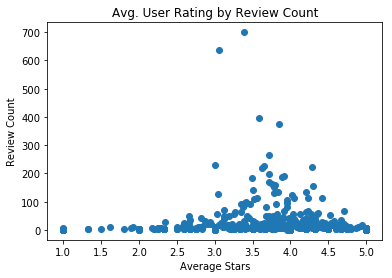

In [126]:
plt.scatter(u_sub.average_stars.values,u_sub.review_count.values)
plt.xlabel('Average Stars')
plt.ylabel('Review Count')
plt.title('Avg. User Rating by Review Count')
plt.show()

In [124]:
fig,ax = plt.subplots(1,1,figsize=(40,10))
a = u_sub.groupby('average_stars')
a['review_count'].agg((np.sum/np.size)).plot(kind='bar',ax=ax)
plt.show()

TypeError: unsupported operand type(s) for /: 'function' and 'function'

In [121]:
np.size

<function numpy.core.fromnumeric.size>

In [176]:
u_sub.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
903324,5.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Roxanne,1,0,R4MssEtXKIsuXjbI5zvr_A,2015-08-04
799761,2.60,0,0,0,0,0,0,0,0,0,...,0,[],0,"[jVTMmE4xqo5W4xg4S2gM1A, y1xEDQL4dHxTMQgOBsTB2g]",0,Ava,4,0,zknJXHytUg8_B_CH3dkXkA,2013-10-25
875429,3.38,0,0,0,0,0,0,0,0,0,...,0,[],0,"[H1Mjt2_WuhHgMgVhancIjw, 3AJ7SSRGbBfaNjHRUxW1A...",0,Heather,31,1,QNgFW93A8PXMnGhQhv2Y8Q,2011-02-22
575539,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Kelsey,4,0,vDUu0WcVg8AhrYbmUeI32Q,2012-09-05
467699,3.63,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Michelle,8,0,TT0Q_SCJz4_aAipNFi3gFw,2011-06-30


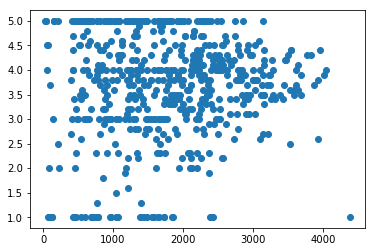

In [237]:
a = u_sub.yelping_since.apply(get_age)
b = u_sub.average_stars.apply(lambda x: round(x,1))
plt.scatter(a,b)
plt.show()

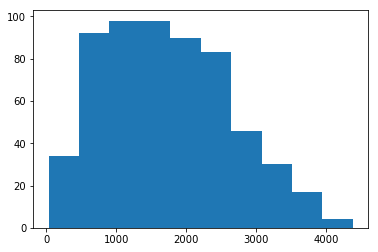

In [195]:
plt.hist(a,bins=10)
plt.show()

In [205]:
(a.sum()/a.size)/365

4.727901703072936

In [206]:
a.max()

4385

### Photos 

In [20]:
p_data = pd.read_json('photos.json',lines=True)

In [37]:
p_data.head()

,business_id,caption,label,photo_id
0,JzB7NITHQ7gVHGVZ1ntgIQ,Black Angus Steak Sandwich... Huge!!!,food,VZXDC7VBdIXXjE3omVqeMg
1,JzB7NITHQ7gVHGVZ1ntgIQ,,outside,c6Em6dDZ4aVKDI8Lc2BQog
2,JzB7NITHQ7gVHGVZ1ntgIQ,,food,VAoFn_z9QF0qVmT5vTdwWA
3,JzB7NITHQ7gVHGVZ1ntgIQ,,food,ToCK6BSwnST8nIzSuskW3g
4,JzB7NITHQ7gVHGVZ1ntgIQ,,food,XFsXCbK5q3ks0n7B8grI8A


### Reviews 

In [77]:
import json

with open('review.json') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

r_data = pd.DataFrame(data)

In [78]:
r_sub = r_data.sample(frac=0.0001)

In [79]:
r_sub.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
3612303,ybHlmdUHLPKfv85bRK4Wtw,2,2014-05-14,1,OltToxBOQRY1MJCxcX8MwQ,5,I've always loved this place and I'm trying to...,1,jJtMKVIUzdDG4xagIOSraA
2749984,Qc0l8rZ3nvrcERitgxu8XA,0,2012-01-14,0,aC29uaSKXM7NoKQeJF23Gg,5,"Great service, great food, and tons of differe...",0,YF63LV51_FDvwt-K_sXKxA
384496,2weQS-RnoOBhb1KsHKyoSQ,3,2013-08-22,2,eUh0TxuuZZztg30Il-3M0w,5,The Buffet at The Wynn is without a doubt the ...,8,oLMx6joPBdocZVhEMBJMiw
2865396,jaJnPIX9VxsFyfV5zQwk0g,0,2014-04-06,0,F8vxgv3LlzvcZNrcbVpS2g,5,"If you love or even like Coke, this place is f...",0,etm3S6j8hYwzPhHdQJr4HA
2965971,3sva_eZx1T3pjFRM8_UYvw,0,2017-02-13,0,POewj4mLH2V2pESDcJl0nA,5,Great customer service and the meals are porti...,0,_jyLCwwI8yg9qdY1jTkI-Q


### Tips

In [99]:
with open('tip.json') as json_file:      
    t_data = json_file.readlines()
    t_data = list(map(json.loads, t_data)) 

In [101]:
t_data = pd.DataFrame(t_data)
t_sub = t_data.sample(frac=0.001)

In [102]:
t_sub.head()

,business_id,date,likes,text,user_id
822368,l07ctcrDMV--TYwe3uzebQ,2017-05-02,0,Gets fairly busy after 4pm on weekdays,h69CQvbyAD7JVOc5VPz0_g
225652,bxRFIGAcYREvDBT3Nw3Vaw,2014-05-20,0,"Great happy hour, awesome food choices!",0-NHIj5lIBTa2mDwTqZz8Q
713917,2NiBvT5zL272IRcxru_x9A,2016-07-08,0,Honestly very nice people but food was not goo...,XQ3hBUKYoOpSVluros6UWg
494371,Mh84_j7YmRrAcm0DWV4bUw,2013-02-01,0,Really delicious. Really Italian. I keep think...,qiA5QI85-A2WB5lKRlyCIQ
480620,O7ot_LMlCfLpOP9tBqeNfw,2013-06-08,0,"Good food, love the boat~! Lolol.",4d7PvOD51AdvX4Wr1xB-5Q
